In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

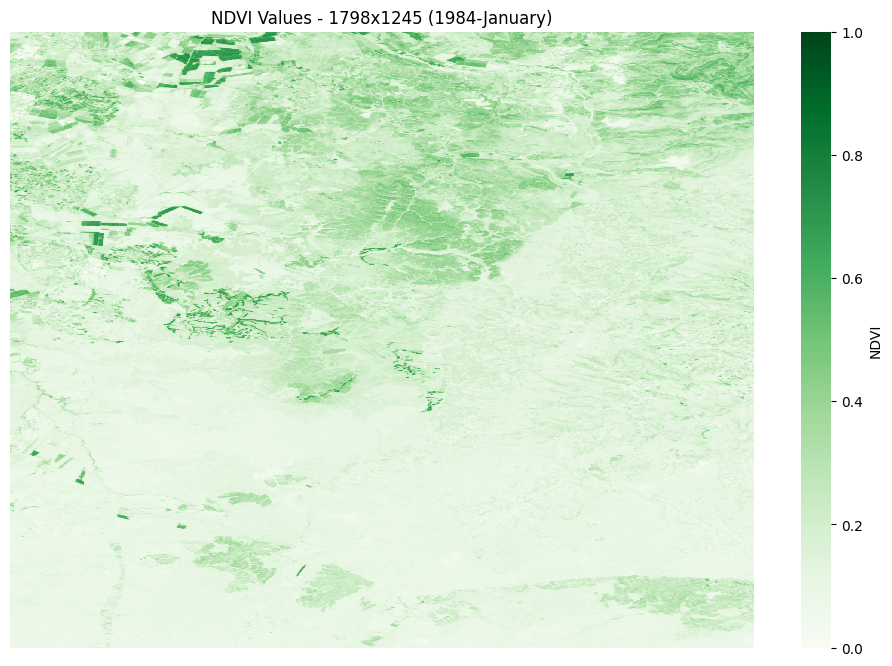

NDVI Statistics for first timestamp:
Mean NDVI: 0.138
Min NDVI: -0.342
Max NDVI: 0.641


In [27]:
# visualize the first timestamp of the data from numpy

# Load the data
data: np.ndarray = np.load('data/Landsat_NDVI_time_series_1984_to_2024.npy')

# Extract first timestamp NDVI values (all pixels)
first_timestamp_ndvi = data[0, :, :, 0]  # [0] for first timestamp, [:,:,0] for NDVI values

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
ax = sns.heatmap(first_timestamp_ndvi, 
                 cmap='Greens',
                 vmin=0,
                 vmax=1,
                 cbar_kws={'label': 'NDVI'})
month = int(data[0,0,0,1])
month_name = datetime.datetime(1900, month, 1).strftime('%B')

plt.title(f'NDVI Values - {first_timestamp_ndvi.shape[0]}x{first_timestamp_ndvi.shape[1]} ({data[0,0,0,2]:.0f}-{month_name})')



plt.axis('off')  # Hide axes
plt.show()

# Print some basic statistics
print(f"NDVI Statistics for first timestamp:")
print(f"Mean NDVI: {np.mean(first_timestamp_ndvi):.3f}")
print(f"Min NDVI: {np.min(first_timestamp_ndvi):.3f}")
print(f"Max NDVI: {np.max(first_timestamp_ndvi):.3f}")

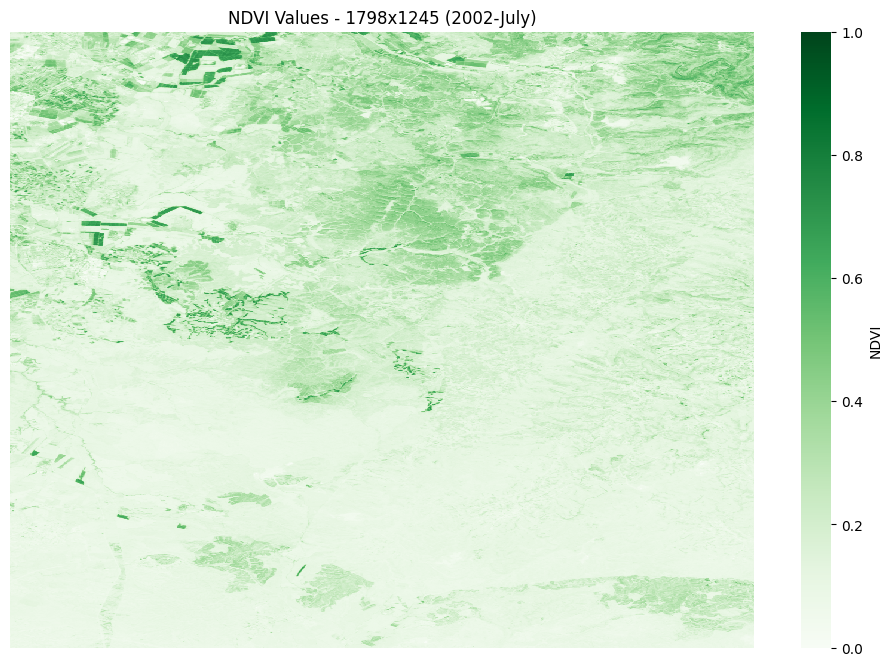

NDVI Statistics for first timestamp:
Mean NDVI: 0.182
Min NDVI: -0.400
Max NDVI: 0.764


In [28]:

# Load the parquet file
df = pd.read_parquet('data/Landsat_NDVI_time_series_1984_to_2024.parquet')

# Get the first timestamp data (year=1984, month=1)
first_timestamp = df[(df['year'] == 2002) & (df['month'] == 7)]

# Reshape the NDVI values back to 2D grid (1798 x 1245)
ndvi_grid = first_timestamp['ndvi'].values.reshape(1798, 1245)

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
ax = sns.heatmap(ndvi_grid, 
                 cmap='Greens',
                 vmin=0,
                 vmax=1,
                 cbar_kws={'label': 'NDVI'})

month = int(first_timestamp['month'].values[0]) 
month_name = datetime.datetime(1900, month, 1).strftime('%B')

plt.title(f'NDVI Values - {first_timestamp_ndvi.shape[0]}x{first_timestamp_ndvi.shape[1]} ({first_timestamp['year'].values[0]:.0f}-{month_name})')
plt.axis('off')  # Hide axes
plt.show()


# Print some basic statistics
print(f"NDVI Statistics for first timestamp:")
print(f"Mean NDVI: {np.mean(ndvi_grid):.3f}")
print(f"Min NDVI: {np.min(ndvi_grid):.3f}")
print(f"Max NDVI: {np.max(ndvi_grid):.3f}")

In [38]:
# Calculate mean NDVI for each timestamp
temporal_means = df.groupby(['year', 'month'])['ndvi'].mean().reset_index()

# Create datetime objects for better x-axis representation
temporal_means['date'] = temporal_means.apply(
    lambda x: datetime.datetime(int(x['year']), int(x['month']), 1), 
    axis=1
)

# same for median
temporal_medians = df.groupby(['year', 'month'])['ndvi'].median().reset_index()

# Create datetime objects for better x-axis representation
temporal_medians['date'] = temporal_medians.apply(
    lambda x: datetime.datetime(int(x['year']), int(x['month']), 1), 
    axis=1
)


Overall Statistics:
Mean NDVI across all time: 0.244
Median NDVI across all time: 0.222
Min NDVI: 0.113
Max NDVI: 0.424

Total number of timestamps: 82


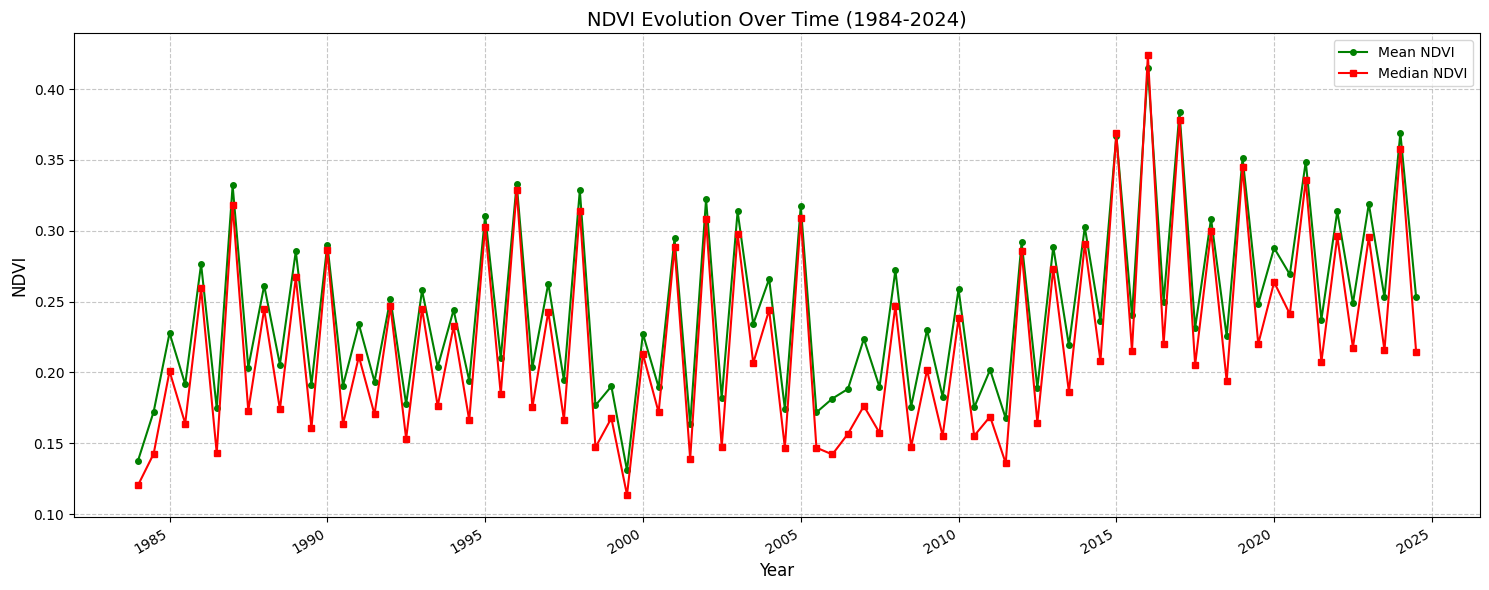


First few timestamps and their NDVI values:
      date  mean_ndvi  median_ndvi
1984-01-01   0.137536     0.120218
1984-07-01   0.172264     0.142573
1985-01-01   0.227791     0.200799
1985-07-01   0.191557     0.163875
1986-01-01   0.276378     0.259247


In [40]:
# Create figure with larger size
plt.figure(figsize=(15, 6))

# Plot mean NDVI
plt.plot(temporal_means['date'], 
         temporal_means['ndvi'], 
         color='green', 
         linewidth=1.5,
         marker='o',  # Add circular markers
         markersize=4,
         label='Mean NDVI')  # Add label for legend

# Plot median NDVI
plt.plot(temporal_medians['date'],
         temporal_medians['ndvi'],
         color='red',
         linewidth=1.5, 
         marker='s',  # Square markers to differentiate
         markersize=4,
         label='Median NDVI')

# Customize the plot
plt.title('NDVI Evolution Over Time (1984-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Show legend

# Format x-axis to show years nicely
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Add some statistics
print(f"Overall Statistics:")
print(f"Mean NDVI across all time: {temporal_means['ndvi'].mean():.3f}")
print(f"Median NDVI across all time: {temporal_medians['ndvi'].mean():.3f}")
print(f"Min NDVI: {min(temporal_means['ndvi'].min(), temporal_medians['ndvi'].min()):.3f}")
print(f"Max NDVI: {max(temporal_means['ndvi'].max(), temporal_medians['ndvi'].max()):.3f}")
print(f"\nTotal number of timestamps: {len(temporal_means)}")

plt.tight_layout()
plt.show()

# Optional: Display the first few rows of both temporal means and medians
print("\nFirst few timestamps and their NDVI values:")
comparison = temporal_means[['date', 'ndvi']].copy()
comparison.columns = ['date', 'mean_ndvi']
comparison['median_ndvi'] = temporal_medians['ndvi']
print(comparison.head().to_string(index=False))